In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/landslide_kisoro.xlsx")

In [ ]:
df.describe()

,RELATIVE HUMIDITY,RAINFALL INTENSITY,MAX TEMP,MIN TEMP,WETSPELL,NDVI,OCCURANCE
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,82.015030,4.366961,21.404528,13.600847,1.571429,0.634799,0.285714
std,2.799524,0.736346,0.330586,0.402393,1.476446,0.040317,0.460044
min,76.808230,2.996652,20.741530,12.941130,0.000000,0.554108,0.000000
25%,80.072712,3.929742,21.196912,13.322498,0.750000,0.603687,0.000000
50%,82.389720,4.313538,21.350850,13.541460,1.000000,0.635738,0.000000
75%,83.364660,4.729167,21.556955,13.789480,2.000000,0.662330,1.000000
max,86.913590,6.306565,22.209840,14.570900,6.000000,0.712194,1.000000


In [ ]:
df.head()

,DATES,RELATIVE HUMIDITY,RAINFALL INTENSITY,MAX TEMP,MIN TEMP,WETSPELL,NDVI,OCCURANCE
0,1/03/2010_31/05/2010,85.65389,4.245348,21.78536,14.27610,0,0.647290,1
1,1/03/2011_31/05/2011,83.22138,3.768467,21.29846,13.36172,2,0.618491,0
2,1/03/2012_31/05/2012,82.95003,4.666652,21.10165,13.44033,0,0.623985,0
3,1/03/2013_31/05/2013,83.67963,4.684413,21.19089,13.74480,3,0.679300,0
4,1/03/2014_31/05/2014,82.48450,3.439935,21.38267,13.34079,2,0.599595,1


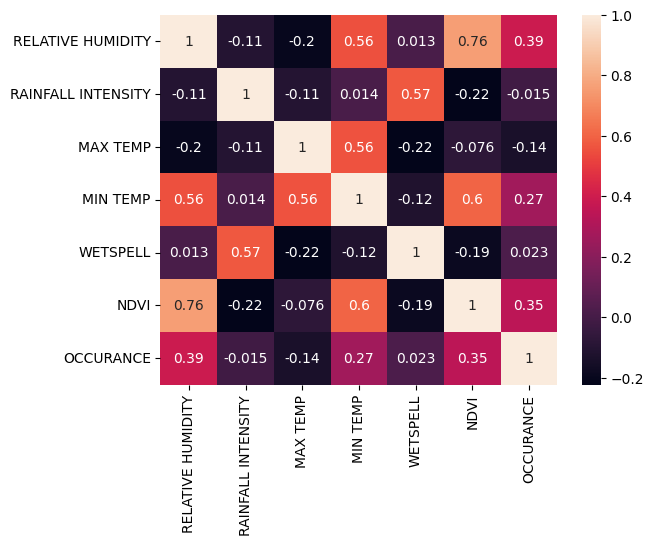

In [ ]:
import seaborn as sns

# Select the desired columns
cols = ['RELATIVE HUMIDITY', 'RAINFALL INTENSITY', 'MAX TEMP', 'MIN TEMP', 'WETSPELL', 'NDVI', 'OCCURANCE']

# Create a heatmap
sns.heatmap(df[cols].corr(), annot=True)
plt.show()


In [ ]:
# @title DATES vs RELATIVE HUMIDITY
alt.Chart(df).mark_line().encode(x='DATES', y='RELATIVE HUMIDITY')

alt.Chart(...)

In [ ]:
# @title DATES vs OCCURANCE
alt.Chart(df).mark_line().encode(x='DATES', y='OCCURANCE')

alt.Chart(...)

In [ ]:
# @title DATES vs RAINFALL INTENSITY
alt.Chart(df).mark_line().encode(x='DATES', y='RAINFALL INTENSITY')

alt.Chart(...)

In [ ]:
# @title DATES vs MAX TEMP
alt.Chart(df).mark_line().encode(x='DATES', y='MAX TEMP')

alt.Chart(...)

In [ ]:
# @title DATES vs MIN TEMP
alt.Chart(df).mark_line().encode(x='DATES', y='MIN TEMP')

alt.Chart(...)

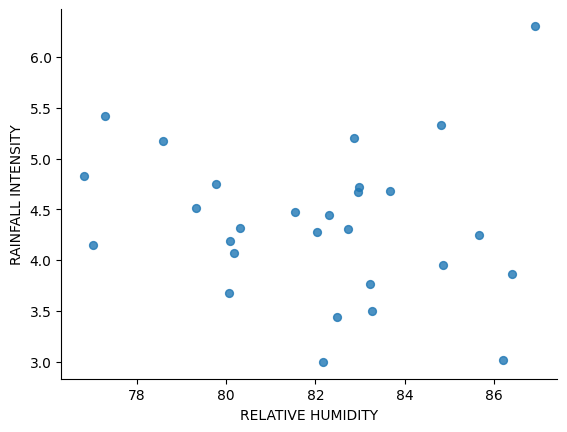

In [ ]:
# @title RELATIVE HUMIDITY vs RAINFALL INTENSITY

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='RELATIVE HUMIDITY', y='RAINFALL INTENSITY', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

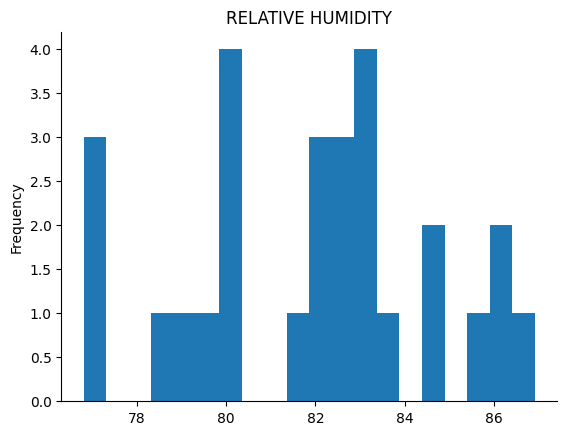

In [ ]:
# @title RELATIVE HUMIDITY

from matplotlib import pyplot as plt
df['RELATIVE HUMIDITY'].plot(kind='hist', bins=20, title='RELATIVE HUMIDITY')
plt.gca().spines[['top', 'right',]].set_visible(False)

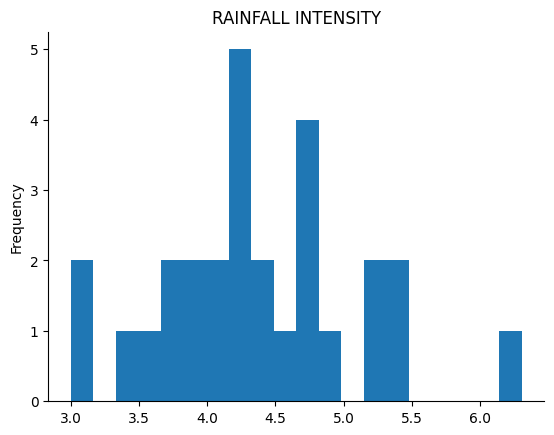

In [ ]:
# @title RAINFALL INTENSITY

from matplotlib import pyplot as plt
df['RAINFALL INTENSITY'].plot(kind='hist', bins=20, title='RAINFALL INTENSITY')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
X = df.drop(columns=["DATES", "OCCURANCE"])
X.columns

Index(['RELATIVE HUMIDITY', 'RAINFALL INTENSITY', 'MAX TEMP', 'MIN TEMP',
       'WETSPELL', 'NDVI'],
      dtype='object')

In [ ]:
y = df["OCCURANCE"]
y.head()

0    1
1    0
2    0
3    0
4    1
Name: OCCURANCE, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print("Model score on test data:", model.score(X_test, y_test))


Model score on test data: 0.8888888888888888


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1])

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

# Display the DataFrame
print(cm_df)


          Predicted 0  Predicted 1
Actual 0            7            1
Actual 1            0            1


In [ ]:
#f1-score

from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Print the F1 score
print("F1 score:", f1)


F1 score: 0.6666666666666666


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence

# Initialize Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation with stratified k-fold
scores = cross_val_score(model, X, y, cv=skf)

# Print the average cross-validation score
print("Average cross-validation score:", scores.mean())

# Print the individual cross-validation scores
print("Individual cross-validation scores:", scores)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Average cross-validation score: 0.7333333333333333
Individual cross-validation scores: [1.         0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.33333333 0.66666667 1.         1.        ]


In [ ]:
import joblib

model_filename = 'landslide_model.h5'
joblib.dump(model, model_filename)


['landslide_model.h5']